#                                         Heart Attack Classifications


<img src='human.png' width="300" height="300">

###  Content
<ul>
    <li><a href='#1'>Importing Data</a></li>
    <li><a href='#2'>Data Cleaning</a></li>
    <li><a href='#3'>Asking Questions</a></li>
    <li><a href='#4'>Some Statistics</a></li>
    <li><a href='#5'>Visualization</a></li>
    <li><a href='#6'>Summary</a></li>
</ul>

<a id='1'></a>
### ---------------------------------------------------------------[Importing Data]------------------------------------------------------------------------

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data=pd.read_csv('heart.csv')

In [63]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
data.shape

(303, 14)

<a id='2'></a>
### ----------------------------------------------------------------[Data Cleaning]------------------------------------------------------------------------

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [66]:
data.rename(columns={'cp':'Chest_pain','chol':'cholestoral'} , inplace=True)
data.head()

,age,sex,Chest_pain,trtbps,cholestoral,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
data['sex']= data['sex'].replace([1,0],['Male','Female'])
data.head()

,age,sex,Chest_pain,trtbps,cholestoral,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
data['output']=data['output'].replace([1,0],['Yes','No'])
data.head()

,age,sex,Chest_pain,trtbps,cholestoral,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,Yes
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,Yes
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,Yes
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,Yes
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,Yes


In [69]:
data.drop(columns=['slp','oldpeak'] , inplace=True)

In [70]:
wrong_ages=data['age']==0
wrong_ages.value_counts()

False    303
Name: age, dtype: int64

In [71]:
data.isnull().sum()

age            0
sex            0
Chest_pain     0
trtbps         0
cholestoral    0
fbs            0
restecg        0
thalachh       0
exng           0
caa            0
thall          0
output         0
dtype: int64

In [72]:
data.duplicated().sum()

1

In [73]:
data.drop_duplicates(inplace=True)

In [74]:
heart_attack = data.loc[data.output=='Yes']
heart_attack.head()

,age,sex,Chest_pain,trtbps,cholestoral,fbs,restecg,thalachh,exng,caa,thall,output
0,63,Male,3,145,233,1,0,150,0,0,1,Yes
1,37,Male,2,130,250,0,1,187,0,0,2,Yes
2,41,Female,1,130,204,0,0,172,0,0,2,Yes
3,56,Male,1,120,236,0,1,178,0,0,2,Yes
4,57,Female,0,120,354,0,1,163,1,0,2,Yes


In [75]:
non_heart_attack = data.loc[data.output=='No']
non_heart_attack.head()

,age,sex,Chest_pain,trtbps,cholestoral,fbs,restecg,thalachh,exng,caa,thall,output
165,67,Male,0,160,286,0,0,108,1,3,2,No
166,67,Male,0,120,229,0,0,129,1,2,3,No
167,62,Female,0,140,268,0,0,160,0,2,2,No
168,63,Male,0,130,254,0,0,147,0,1,3,No
169,53,Male,0,140,203,1,0,155,1,0,3,No


<a id='3'></a>
### -------------------------------------------------------------[Asking Questions]---------------------------------------------------------------------

- How many patients have heart disease?
- What is the average Cholesterol level of people with heart disease and without heart disease?
- what the relation between the high cholesterol and the heart disease?
- what is the average resting blood pressure of each age for people with and without heart disease?
- what is the relation between resting blood pressure of people with heart disease and without?

<a id='4'></a>
### ------------------------------------------------------------------[Statistics]----------------------------------------------------------------------------

In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
Chest_pain,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
cholestoral,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
caa,302.0,0.718543,1.006748,0.0,0.00,0.0,1.00,4.0
thall,302.0,2.314570,0.613026,0.0,2.00,2.0,3.00,3.0


## 
## 

In [77]:
sum=0
for x in heart_attack.age :
    if 50<=x :    
     sum+=1
print(sum*100/len(heart_attack))

62.80487804878049


Most of patients almost 62.8% are over 50 years old


In [78]:
pd.value_counts(heart_attack['sex'])

Male      92
Female    72
Name: sex, dtype: int64

In [79]:
sum=0
for x in heart_attack.sex:
    if x=='Male':
     sum+=1
print(sum*100/len(heart_attack))

56.09756097560975


Almost 56% of patients are males

In [80]:
cholestoral_risk = heart_attack['cholestoral']>240
heart_attack.sex[cholestoral_risk].value_counts()

Female    40
Male      32
Name: sex, dtype: int64

In [81]:
ideal_cholestoral = data['cholestoral']<200
data.sex[ideal_cholestoral].value_counts()

Male      35
Female    14
Name: sex, dtype: int64

In [82]:
heart_attack['cholestoral'].mean()

242.640243902439

In [83]:
heart_attack['cholestoral'].std()

53.456580304526184

In [84]:
sum=0
for x in heart_attack.cholestoral:
    if  x > 240 :
     sum+=1
print(sum*100/len(heart_attack))

43.90243902439025


43.9% of patients have high level cholestoral

In [85]:
heart_attack.Chest_pain.value_counts()

2    68
1    41
0    39
3    16
Name: Chest_pain, dtype: int64

In [86]:
print(68/len(heart_attack)*100)

41.46341463414634


In [87]:
heart_attack.trtbps.mean()

129.25

In [88]:
heart_attack.fbs.value_counts()

0    141
1     23
Name: fbs, dtype: int64

In [89]:
heart_attack.restecg.value_counts()

1    95
0    68
2     1
Name: restecg, dtype: int64

In [90]:
heart_attack.thalachh.max()

202

In [91]:
heart_attack.thalachh.min() 

96

In [92]:
heart_attack.exng.value_counts() 

0    141
1     23
Name: exng, dtype: int64

##  
## 

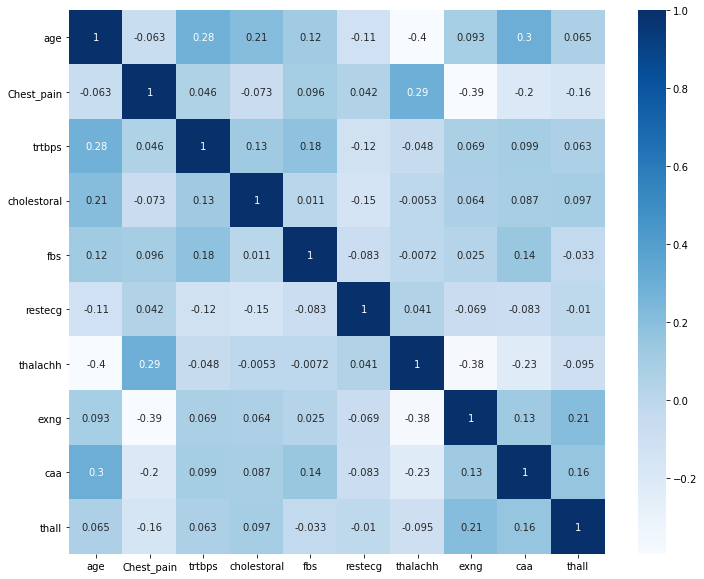

In [93]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues' );

<a d='5'></a>
### ---------------------------------------------------------------[Visualization]---------------------------------------------------------------------------

In [94]:
data.groupby('sex')['age'].mean()

sex
Female    55.677083
Male      53.834951
Name: age, dtype: float64

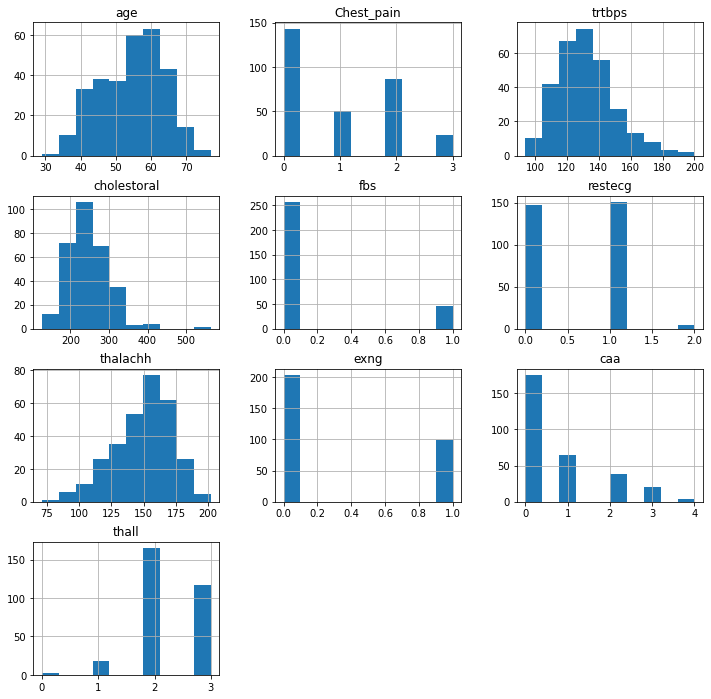

In [95]:
data.hist(figsize=(12,12));

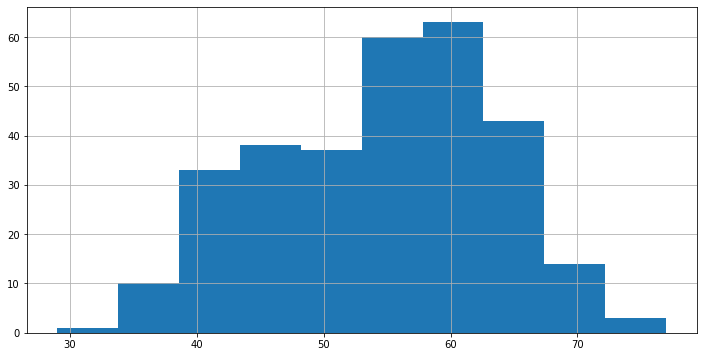

In [96]:
data.age.hist(bins=10 , figsize=(12,6));

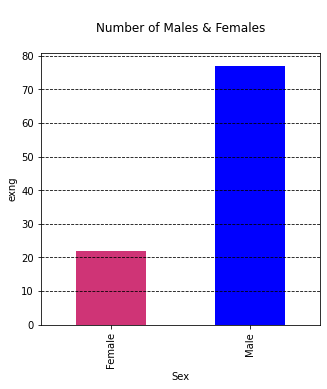

In [97]:
data.groupby('sex').sum().exng.plot(kind='bar' , title='\nNumber of Males & Females\n' , color=['#cf3476','blue'] , figsize=(5,5));
plt.xlabel('Sex')
plt.ylabel('exng')
plt.grid(axis='y' , color='black' ,linestyle='--')
plt.show()

Text(0.5, 0, 'Age')

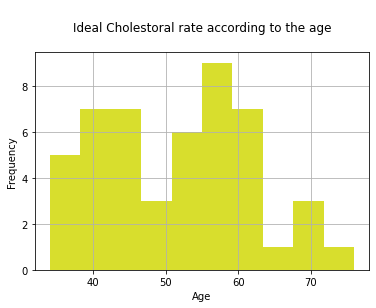

In [98]:
data.age[ideal_cholestoral].plot(kind='hist' , color='#d8de2d');
plt.grid()
plt.title("\nIdeal Cholestoral rate according to the age\n");
plt.xlabel("Age")


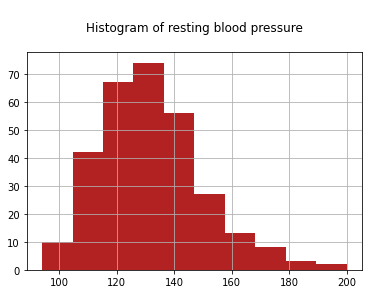

In [99]:
data['trtbps'].hist(color='#b22222');
plt.title("\nHistogram of resting blood pressure\n");

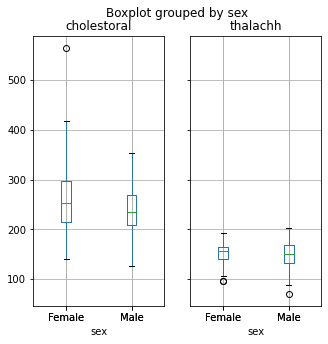

In [100]:
data.boxplot(column=['cholestoral','thalachh'] , figsize=(5,5) , by='sex');

## ----------------------------------------------------------------------------------------------------------------------------------
# ( Heart_Attack )


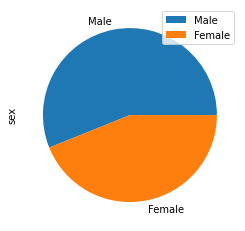

In [103]:
heart_attack['sex'].value_counts().plot(kind='pie')
plt.legend();

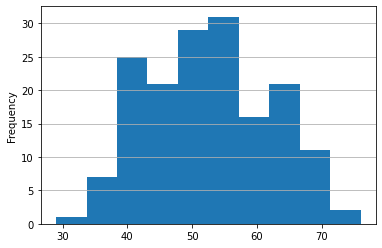

In [104]:
heart_attack['age'].plot(kind='hist')
plt.grid(axis='y')

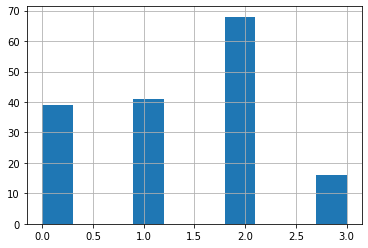

In [105]:
heart_attack['Chest_pain'].hist();

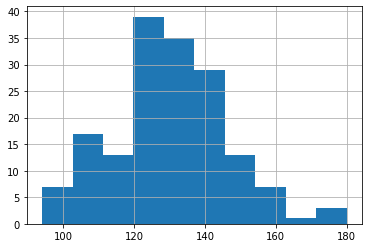

In [106]:
heart_attack.trtbps.hist();

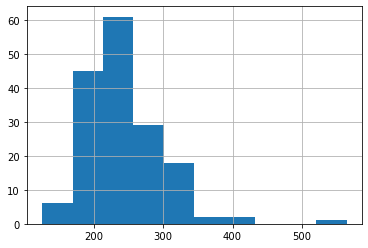

In [107]:
heart_attack.cholestoral.hist();

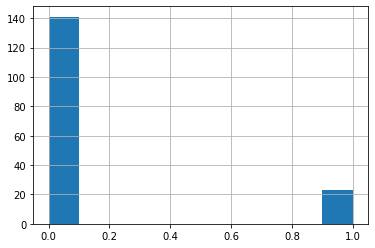

In [108]:
heart_attack.fbs.hist();

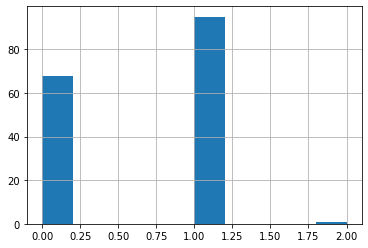

In [109]:
heart_attack.restecg.hist();

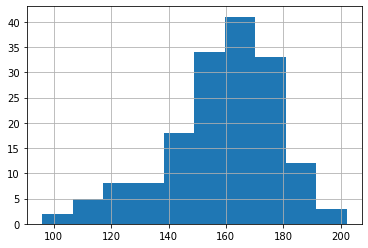

In [110]:
heart_attack.thalachh.hist();

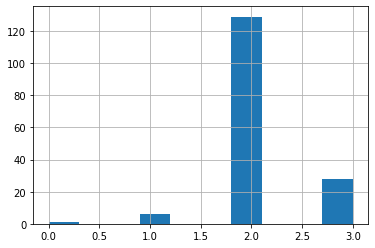

In [111]:
heart_attack.thall.hist();

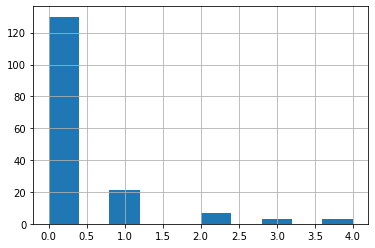

In [113]:
heart_attack.caa.hist();

<a id='6'></a>
### -----------------------------------------------------------------[Summary]-----------------------------------------------------------------------------

- 164 of patients have heart disease and 138 have no heart disease
- Most of patients almost 62.8% are over 50 years old
- Almost 56% of patients are males
- 43.9% of patients have high level cholestoral
- The porpotion of men with high cholestoral level is greater than women
- The Average Cholesterol level of people with heart disease is 242.640244 & the STD is 53.456580
- The median age of people with cholesterol higher than 240 is 57.0 & the mean is 55.83443708609271
- Most of patients approximally 41.46% have no chest pain
- Average resting blood pressure for patients is 129.25
- Most of patients have fasting blood sugar < 120
- Most of patients have either a normal resting electrocardio or having ST-T wave abnormality
- The max heart beat recorded was 202 and the min was 96
- Most of people with heart attack have no exercise induced angina
- The average Cholesterol level of people without heart disease is 251.086957 & the STD is 49.454614